In [ ]:
!pip install adjustText

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from adjustText import adjust_text

# 1. Read parsed dem file

In [ ]:
file_name = 'kev1n_b_no hacks 2.dem.csv'

tick_rate=64
df = pd.read_csv(file_name, sep=";", decimal=".")

df.sample(10)

,Tick,Round,PlayerID,PlayerName,KillFlag,DamageFlag,WeaponFireFlag,Weapon,HitGgroup,VictimName,VictimID,ViewX,ViewY,CoordX,CoordY,Victim_ViewX,Victim_ViewY,Victim_CoordX,Victim_CoordY
34152,14779,3,3,Mclov1n,0,0,0,NaN,NaN,NaN,NaN,343.817139,12.392578,-1314.613770,-2327.768311,NaN,NaN,NaN,NaN
361025,122107,23,6,kev1n_b,0,0,0,NaN,NaN,NaN,NaN,111.165161,7.860718,1296.000000,-352.000000,NaN,NaN,NaN,NaN
40557,16217,3,6,kev1n_b,0,0,0,NaN,NaN,NaN,NaN,334.544678,357.363281,-1504.038452,-2123.883057,NaN,NaN,NaN,NaN
262976,85576,16,3,Mclov1n,0,0,0,NaN,NaN,NaN,NaN,173.248901,23.087769,1296.000000,-256.000000,NaN,NaN,NaN,NaN
206066,65536,13,11,Слон ганеша,0,0,0,NaN,NaN,NaN,NaN,249.038086,6.333618,-676.576965,-1309.572266,NaN,NaN,NaN,NaN
254332,83104,16,6,kev1n_b,0,0,0,NaN,NaN,NaN,NaN,258.480835,5.608521,1136.000000,-256.000000,NaN,NaN,NaN,NaN
184286,58934,12,3,Mclov1n,0,0,0,NaN,NaN,NaN,NaN,180.291138,4.405518,-1315.960815,691.900818,NaN,NaN,NaN,NaN
298760,98311,18,14,₴Ø₴₳ ฿ɆɎ฿ł,0,0,0,NaN,NaN,NaN,NaN,11.887207,2.845459,-1545.323486,-1036.355469,NaN,NaN,NaN,NaN
422040,144544,27,3,Mclov1n,0,0,0,NaN,NaN,NaN,NaN,82.809448,18.072510,1217.846313,-110.038780,NaN,NaN,NaN,NaN
267194,86780,16,3,Mclov1n,0,0,0,NaN,NaN,NaN,NaN,173.248901,23.087769,1296.000000,-256.000000,NaN,NaN,NaN,NaN


# 2. Select player

In [ ]:
df[['PlayerName','PlayerID']].drop_duplicates()

,PlayerName,PlayerID
0,J∅sĦi,7
1,PUMP,8
2,Unotheactivist,10
3,-sexy_helloplast >3,12
4,₴Ø₴₳ ฿ɆɎ฿ł,14
5,Mclov1n,3
6,kev1n_b,6
7,vaN1N,9
8,NiggBlaster,13
9,Слон ганеша,11


In [ ]:
suspicious_player = "Almost Sparker" #kev1n_b

#2 events we want to track: kill & damage
columns = ['Tick', 'Round', 'KillFlag','DamageFlag','ViewX','ViewY']

data = df.query('PlayerName==@suspicious_player')[columns].values
# data

In [ ]:
#diplay all kills made by suspicious_player using AK-47
players = df.query('PlayerName==@suspicious_player and KillFlag==1')[columns]

#df.query('PlayerName==@suspicious_player and KillFlag==1 and Weapon=="AK-47"')

,Tick,Round,KillFlag,DamageFlag,ViewX,ViewY
14178,10114,1,1,0,287.297974,0.878906
42102,16661,3,1,0,15.842285,354.391479
42608,16863,3,1,0,26.674805,1.208496
43675,17485,3,1,0,85.748291,2.746582
93199,31843,6,1,0,172.836914,0.659180
94181,32237,6,1,0,154.962158,355.160522
110867,37274,7,1,0,85.989990,3.515625
135746,43984,9,1,0,71.169434,354.281616
148935,47659,10,1,0,330.743408,13.139648
150681,48271,10,1,0,87.835693,4.674683


In [ ]:
df.query('PlayerName==@suspicious_player and KillFlag==1 ')

,Tick,Round,PlayerID,PlayerName,KillFlag,DamageFlag,WeaponFireFlag,Weapon,HitGgroup,VictimName,VictimID,ViewX,ViewY,CoordX,CoordY,Victim_ViewX,Victim_ViewY,Victim_CoordX,Victim_CoordY
14178,10114,1,6,kev1n_b,1,0,0,USP-S,Head,J∅sĦi,7.0,287.297974,0.878906,-1167.189575,778.825134,104.776611,0.642700,-1065.564209,402.459045
42102,16661,3,6,kev1n_b,1,0,0,M4A4,Chest,Слон ганеша,11.0,15.842285,354.391479,-1363.303833,-2446.010010,197.083740,7.745361,51.274502,-2028.085693
42608,16863,3,6,kev1n_b,1,0,0,M4A4,Head,NiggBlaster,13.0,26.674805,1.208496,-1173.326660,-2473.956299,207.504272,0.944824,-102.403442,-1933.937012
43675,17485,3,6,kev1n_b,1,0,0,M4A4,Stomach,-sexy_helloplast >3,12.0,85.748291,2.746582,-1737.750732,-1904.292847,259.293823,9.052734,-1605.797729,-1022.389465
93199,31843,6,6,kev1n_b,1,0,0,M4A4,Head,₴Ø₴₳ ฿ɆɎ฿ł,14.0,172.836914,0.659180,-950.963074,161.508591,353.193970,6.992798,-2064.882080,300.405914
94181,32237,6,6,kev1n_b,1,0,0,M4A4,Head,Слон ганеша,11.0,154.962158,355.160522,-1261.556396,292.586273,334.912720,6.542358,-2100.480713,684.026489
110867,37274,7,6,kev1n_b,1,0,0,M4A4,RightArm,-sexy_helloplast >3,12.0,85.989990,3.515625,-2351.491211,-95.303200,272.092896,7.157593,-2304.189941,318.604340
135746,43984,9,6,kev1n_b,1,0,0,M4A4,Head,-sexy_helloplast >3,12.0,71.169434,354.281616,-1880.523926,-95.422295,249.757690,10.947876,-1574.636719,790.944214
148935,47659,10,6,kev1n_b,1,0,0,MP9,Head,-sexy_helloplast >3,12.0,330.743408,13.139648,-1981.379761,558.331116,155.972900,5.817261,-1769.186890,439.116028
150681,48271,10,6,kev1n_b,1,0,0,MP9,Head,J∅sĦi,7.0,87.835693,4.674683,-1990.669434,301.626526,268.796997,22.263794,-1985.568237,450.024109


In [ ]:
#select exact kill event by kill tick
kill_tick = 47087

#indicate how many seconds before and after the kill moment you want to track
time_range = 1

pl_gaze = data[(data[:,0]>=kill_tick-tick_rate*time_range) & (data[:,0]<=kill_tick+tick_rate*time_range)]

# 3. Plot and analyze gaze velocity and direction

## Some functions for visualization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def plot_gaze_velocity(pl_gaze,time_range,y_limit=8,tick_rate=64):

    dt = np.diff(pl_gaze[:,0])/tick_rate #convert ticks to seconds

    #calculate dx and dy
    dxy = abs(np.diff(pl_gaze[:,-2:],axis=0))
    #transform angles
    dxy = np.where(dxy>180,360-dxy,dxy)/180
    #calculate gaze change rate
    dxy = np.sqrt(np.sum(dxy**2,axis=1)) #root(dx^2+dy^2)
    vel = dxy/dt

    start_tick = pl_gaze[:,0][0]
    time_ = (pl_gaze[:,0]-start_tick)/tick_rate


    fig = plt.figure(1, figsize = (14,10))
    plt.rc('axes', titlesize=14)
    plt.rc('axes', labelsize=14)
    plt.rc('xtick', labelsize=14)
    plt.rc('ytick', labelsize=14)

    for t in pl_gaze[:,0][np.where(pl_gaze[:,2]==1)]:
        plt.plot([(t-start_tick)/tick_rate-time_range]*2,[0,y_limit],'g-')
        plt.text([(t-start_tick)/tick_rate][0]-time_range*0.05-time_range,y_limit*0.8,'damage',rotation=90,c='g',size=14)

    for t in pl_gaze[:,0][np.where(pl_gaze[:,1]==1)]:
        plt.plot([(t-start_tick)/tick_rate-time_range]*2,[0,y_limit],'r-')
        plt.text([(t-start_tick)/tick_rate][0]-time_range*0.05-time_range,y_limit*0.7,'kill',rotation=90,c='r',size=14)

    new_time_ = (time_[:-1]+np.diff(time_)/2)-time_range
    plt.plot(new_time_,vel);
    plt.ylim((0,y_limit))
    plt.ylabel('Gaze change rate (deg°/sec)')
    plt.xlabel('Time (sec)');

def plot_gaze_direction(pl_gaze,axis='x',time_range=1,y_limit_min=-20,y_limit_max=20):
    coord =-2 if axis.lower() =='x' else -1
    fig = plt.figure(1, figsize = (12,8))
    plt.rc('legend', fontsize=12)
    plt.rc('axes', titlesize=12)

    view_ = pl_gaze[:,coord]

    view_ = np.where(view_>180,360-view_,view_)
    kills_ = pl_gaze[:,1]
    damages_ = pl_gaze[:,2]

    start_tick = pl_gaze[:,0][0]
    time_ = (pl_gaze[:,0]-start_tick)/tick_rate-time_range

    plt.plot(time_,view_,'k.-',linewidth=1)
    plt.scatter(time_[np.where(damages_==1)], view_[np.where(damages_==1)], c = 'g',alpha=0.6,linewidths=5, label='damage')
    plt.scatter(time_[np.where(kills_==1)], view_[np.where(kills_==1)], c = 'r',alpha=0.6,linewidths=5, label='kill')
    plt.ylabel('Angle (deg°)')
    plt.xlabel('Time (sec)');
    if coord==-1:
        plt.ylim(y_limit_min,y_limit_max)

    add_ = 'X' if coord==-2 else 'Y'
    plt.title(f'Gaze direction in time along {add_} axis')

In [ ]:
file_name = '/content/drive/MyDrive/IW/Anti-cheat_CSGO/almost_sparker.dem_nn.csv'

tick_rate=64
df = pd.read_csv(file_name, sep=";", decimal=".")
df[['PlayerName','PlayerID']].drop_duplicates()

,PlayerName,PlayerID
0,Яна Мефе,4
1,fragerinho,8
2,̶𝒘𝒐̶𝒍̶𝒇̶𝒊̶,12
3,TILT DYNASTY,3
4,LittleBitch,9
5,NOFlash,13
6,🖤✪,7
7,n0ck j0rc,10
8,ExPanda,11
9,Almost Sparker,14


In [ ]:
players = df[['PlayerName']].drop_duplicates().values
print(players)

[['Яна Мефе']
 ['fragerinho']
 ['̶𝒘𝒐̶𝒍̶𝒇̶𝒊̶']
 ['TILT DYNASTY']
 ['LittleBitch']
 ['NOFlash']
 ['🖤✪']
 ['n0ck j0rc']
 ['ExPanda']
 ['Almost Sparker']]


In [ ]:
columns2 = ['Tick']
columns3 = ['HitGgroup']
#ticks = df.query('PlayerName==@suspicious_player and KillFlag==1')[columns2].values
sus_point = 0
time_range = 0.6
#print(ticks)
# df.query('PlayerName==@suspicious_player and Tick>=@tick-100 and Tick<=@tick+100')
for player in players:
    sum = 0
    count=0
    count_head = 0
    #print(type(player))
    parts = df.query('PlayerName==@player[0] and KillFlag==1')[columns3].values
    for part in parts:
        if part=='Head':
            count_head+=1

    ticks = df.query('PlayerName==@player[0] and KillFlag==1')[columns2].values
    for kil_tick in ticks:
        pl_gaze = data[(data[:,0]>=kil_tick-tick_rate*time_range) & (data[:,0]<=kil_tick+tick_rate*time_range/9)]

        #print(pl_gaze)
        sum = sum +1
        # print(kil_tick)
        # print(player)
        # print(sum)
        dt = np.diff(pl_gaze[:,0])/tick_rate #convert ticks to seconds

        #calculate dx and dy
        dxy = abs(np.diff(pl_gaze[:,-2:],axis=0))
        #transform angles
        dxy = np.where(dxy>180,360-dxy,dxy)/180
        #calculate gaze change rate
        dxy = np.sqrt(np.sum(dxy**2,axis=1)) #root(dx^2+dy^2)
        vel = dxy/dt
        for v in vel:
            if v>3:
                count+=1

    sus = count/sum

    print(player)
    print('number of suspicious moments: ', count)
    print('avg moments per kill: ', sus)
    print('hs percentage: ', count_head/sum)
    hs = count_head/sum
    #print(hs+sus)





['Яна Мефе']
number of suspicious moments:  2
avg moments per kill:  0.14285714285714285
hs percentage:  0.35714285714285715
['fragerinho']
number of suspicious moments:  1
avg moments per kill:  0.1111111111111111
hs percentage:  0.3333333333333333
['̶𝒘𝒐̶𝒍̶𝒇̶𝒊̶']
number of suspicious moments:  1
avg moments per kill:  0.05555555555555555
hs percentage:  0.3888888888888889
['TILT DYNASTY']
number of suspicious moments:  1
avg moments per kill:  0.07142857142857142
hs percentage:  0.5
['LittleBitch']
number of suspicious moments:  2
avg moments per kill:  0.10526315789473684
hs percentage:  0.42105263157894735
['NOFlash']
number of suspicious moments:  0
avg moments per kill:  0.0
hs percentage:  0.3333333333333333
['🖤✪']
number of suspicious moments:  0
avg moments per kill:  0.0
hs percentage:  0.3333333333333333
['n0ck j0rc']
number of suspicious moments:  1
avg moments per kill:  0.1
hs percentage:  0.4
['ExPanda']
number of suspicious moments:  0
avg moments per kill:  0.0
hs perce

## Resulting plots

In [ ]:
suspicious_player = ["LittleBitch","NOFlash","Almost Sparker"]

In [ ]:
i = 0
t = []

In [ ]:
ticks = df.query('PlayerName=="Almost Sparker" and KillFlag==1')[columns2].values
for kil_tick in ticks:
        pl_gaze = data[(data[:,0]>=kil_tick-tick_rate*time_range) & (data[:,0]<=kil_tick+tick_rate*time_range/9)]
        # i=+1
        # t.append(pl_gaze)

In [ ]:
len(pl_gaze)

22

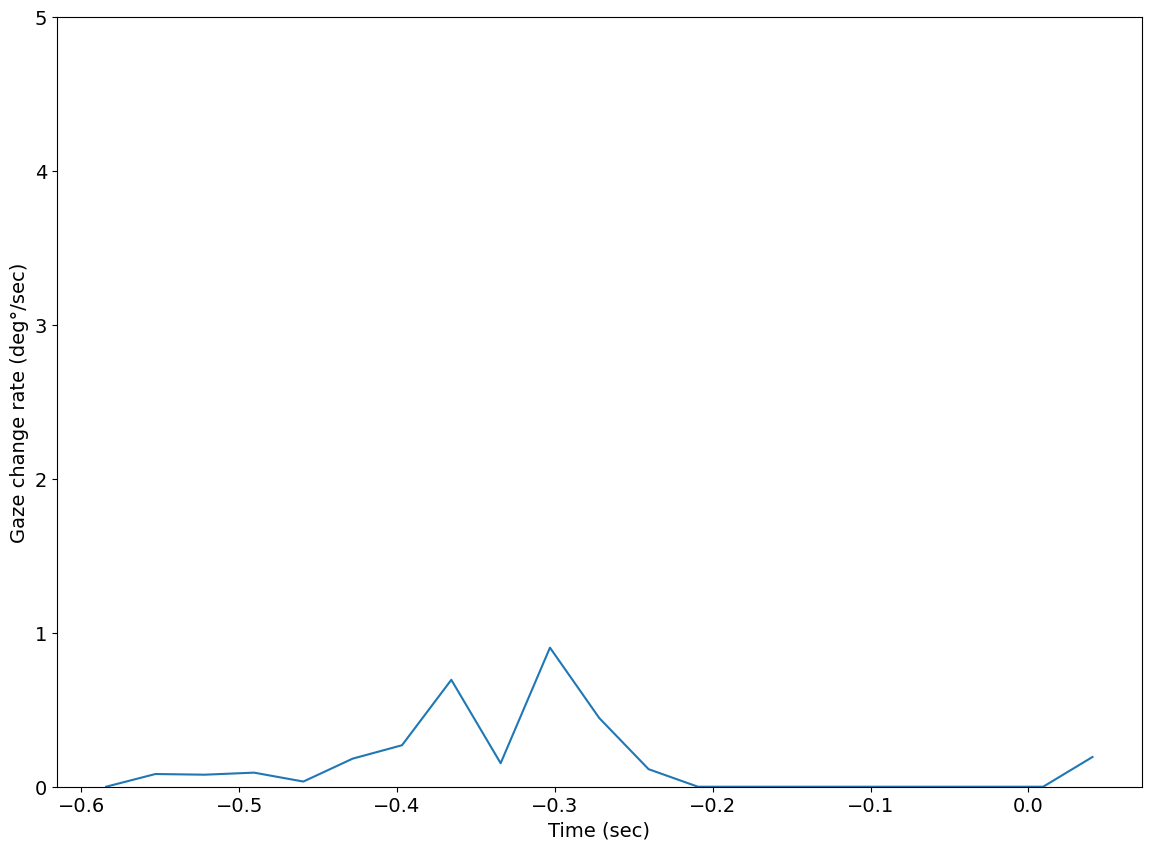

In [ ]:
plot_gaze_velocity(pl_gaze,time_range,y_limit=5)

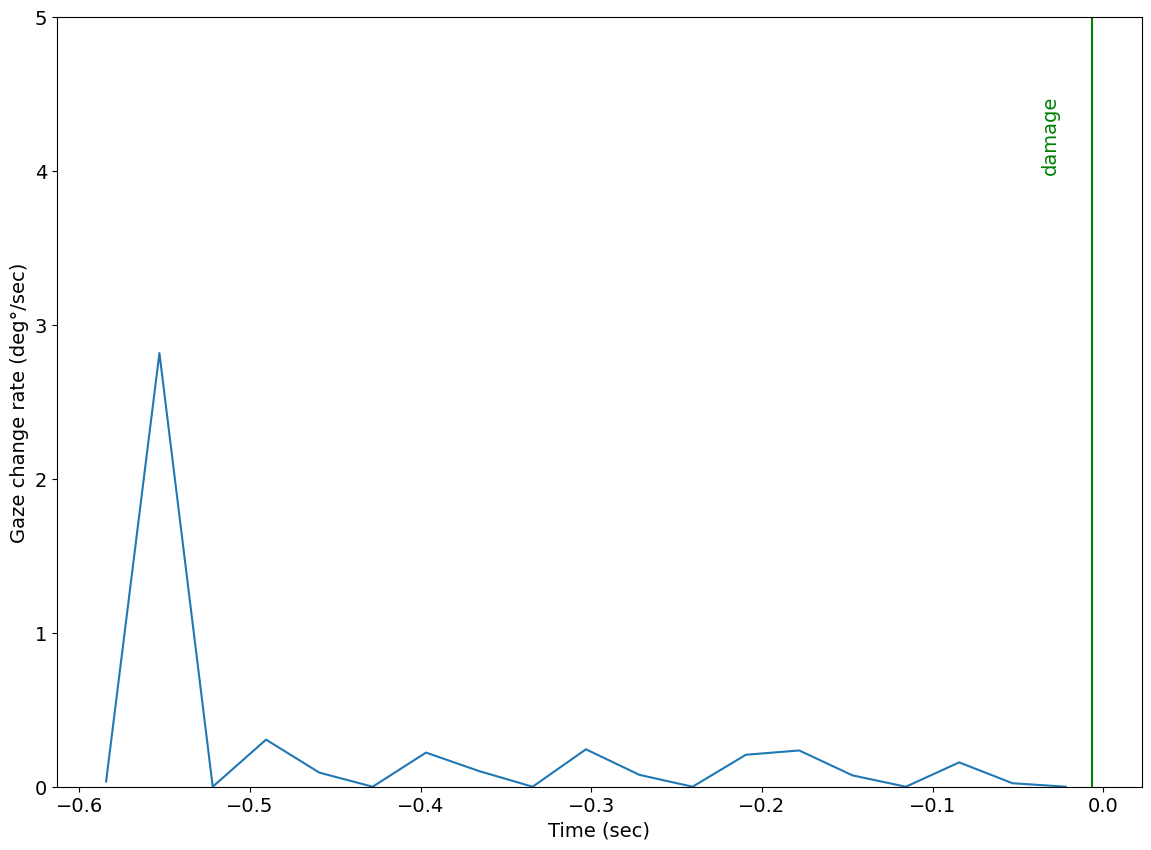

In [ ]:
plot_gaze_velocity(pl_gaze,time_range,y_limit=5)

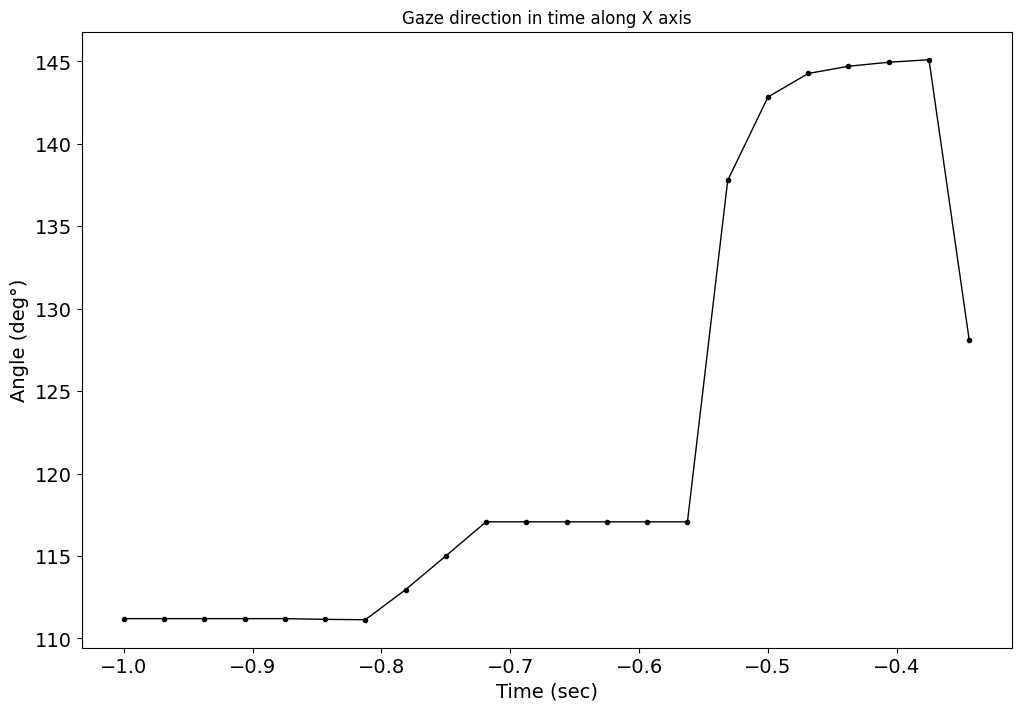

In [ ]:
plot_gaze_direction(pl_gaze,axis='x')

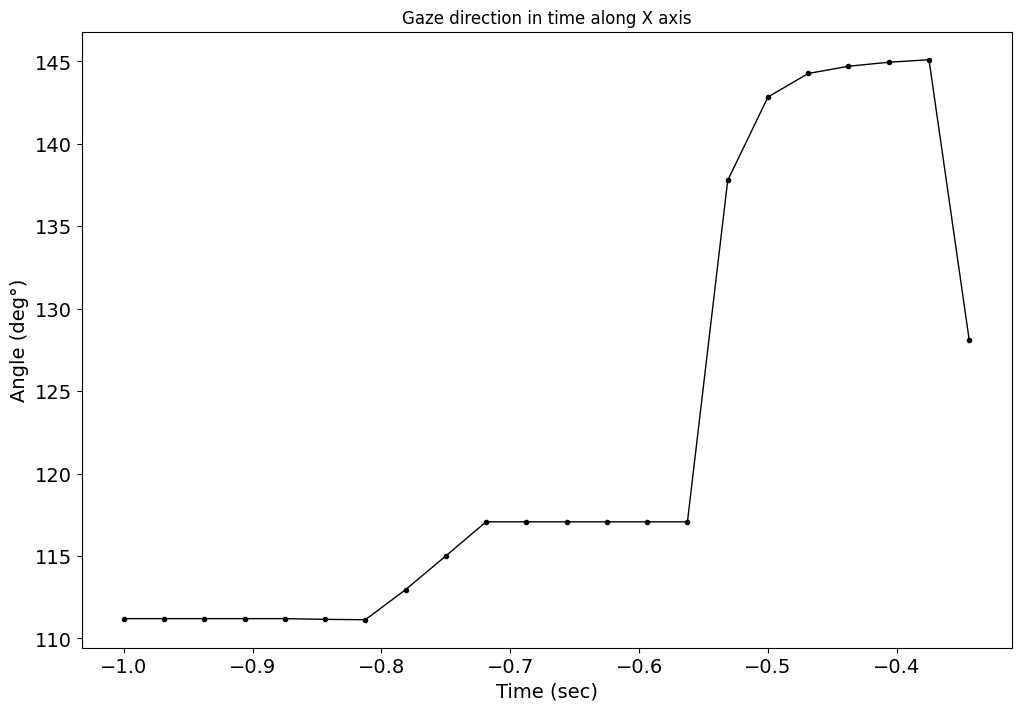

In [ ]:
plot_gaze_direction(pl_gaze,axis='x')

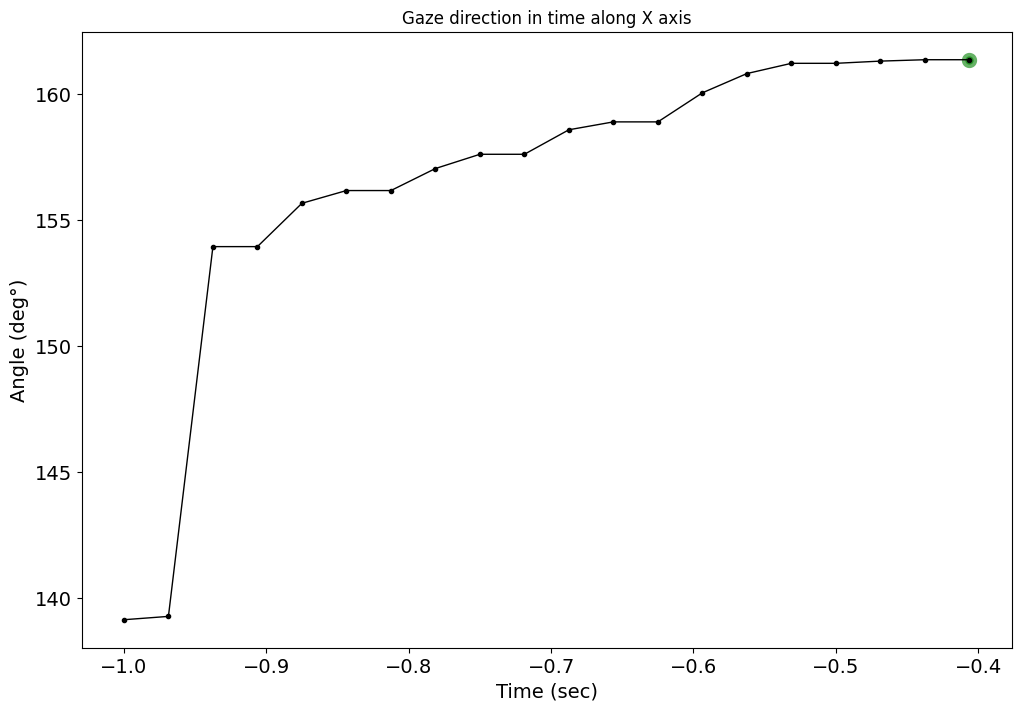

In [ ]:
plot_gaze_direction(pl_gaze,axis='x')

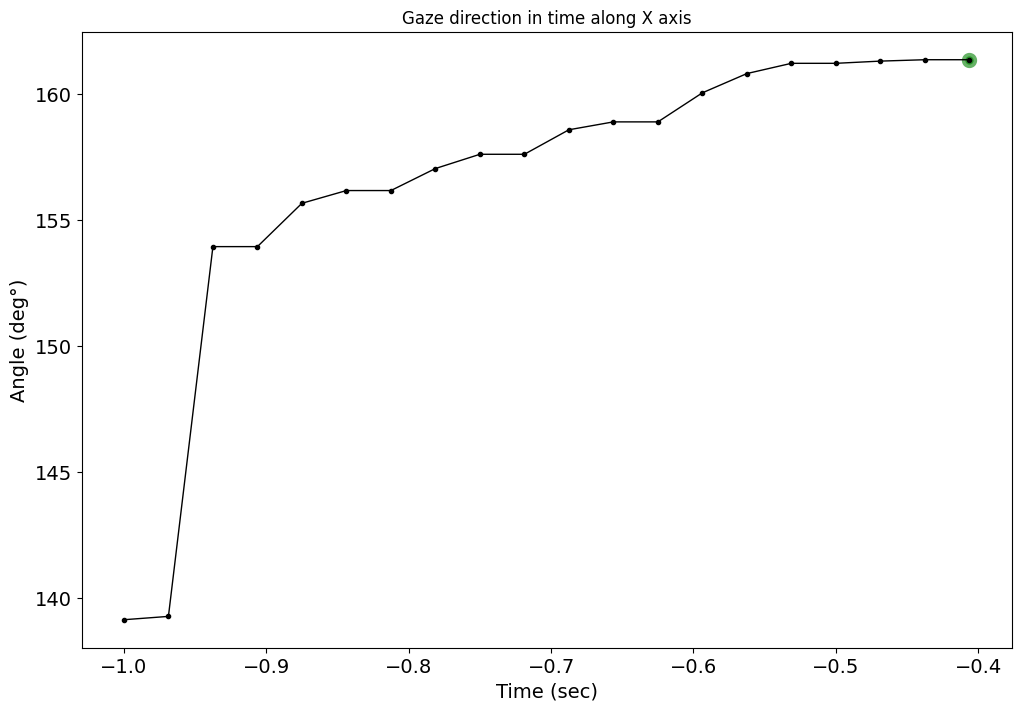

In [ ]:
plot_gaze_direction(pl_gaze,axis='x')

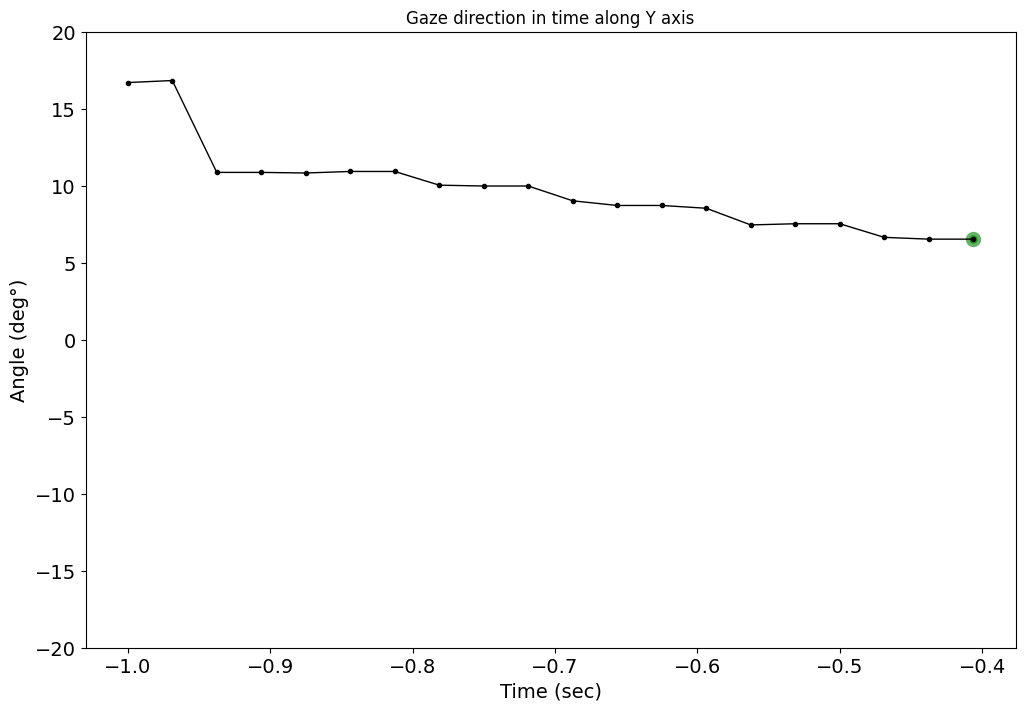

In [ ]:
plot_gaze_direction(pl_gaze,axis='y',y_limit_min=-20,y_limit_max=20)